In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Creating Samples data
X,y = make_regression(n_samples=100,n_features=1,n_targets=1,noise=20,n_informative=1)

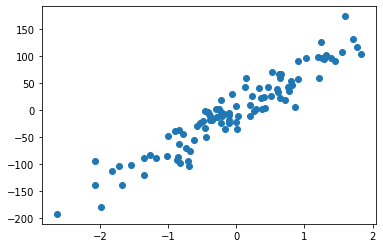

In [3]:
plt.scatter(X,y)

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [5]:
from sklearn.model_selection import train_test_split

In [11]:
lr.fit(X,y)
print("intercept : ",lr.intercept_)
print("Cofficent (m) : ",lr.coef_)

intercept :  0.1453487091929122
Cofficent (m) :  [71.24990545]


In [1]:
#MyGD
class GDRegression:
    def __init__(self,learning_rate, epochs):
        self.m = 100 #random cofficent
        self.b = -120  # Random intercept
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self,X,y):
        #Calculating "m" and "b" using GD
        for i in range(self.epochs):
            #Calculating loss slop
            loss_slop_b = -2*np.sum(y - self.m*X.ravel() - self.b)
            loss_slop_m = -2*np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            # updating "m" and "b" using GD formula
            
            self.m = self.m - (self.lr*loss_slop_m)
            self.b = self.b - (self.lr*loss_slop_b)
            #print(self.m,self.b)
            
        print("Cofficent : ", self.m, " | Intercept : ", self.b)
        
    def predict(self,X):
        return self.m*X + self.b

In [20]:
gd = GDRegression(0.005,30)
gd.fit(X,y)

69.81189747848519 1.2588285513497937
71.13221510387966 0.08965522661466019
71.2345869437566 0.1407906083992144
71.24801582142969 0.14475542945091313
71.24967115260213 0.14527552459585713
71.24987641430404 0.14533963492041457
71.24990185205195 0.14534758462531208
71.24990500468937 0.14534856981927377
71.24990539541058 0.14534869191967958
71.24990544383452 0.14534870705215874
71.24990544983594 0.145348708927598
71.24990545057972 0.14534870916002904
71.2499054506719 0.14534870918883677
71.24990545068333 0.1453487091924066
71.24990545068474 0.14534870919284965
71.2499054506849 0.1453487091929043
71.24990545068493 0.14534870919291018
71.24990545068493 0.1453487091929125
71.24990545068493 0.1453487091929123
71.24990545068493 0.14534870919291237
71.24990545068493 0.14534870919291246
71.24990545068493 0.14534870919291223
71.24990545068493 0.14534870919291232
71.24990545068493 0.1453487091929124
71.24990545068493 0.14534870919291248
71.24990545068493 0.14534870919291226
71.24990545068493 0.1453

- Perfectly Calculating Similar to linearRegression

## Comparing LinearRegression and GDRegressor accuricy

In [22]:
from sklearn.metrics import r2_score

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_pred,y_test)

0.8781828626394724

In [27]:
gd = GDRegression(0.005,30)
gd.fit(X_train,y_train)
y_pred = gd.predict(X_test)
r2_score(y_pred,y_test)

Cofficent :  70.77849868843178  | Intercept :  0.7939838435947034


0.8781828626394724

- Our Both Model Perform Same With both Model

## Copying Animation code

In [28]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


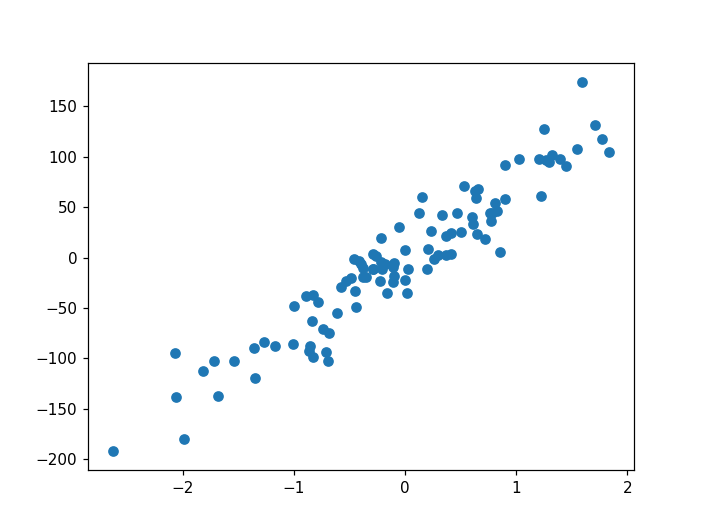

In [29]:
plt.scatter(X,y)

In [32]:
#We are Storing every Possible value of "b","m" and "cost function"
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

<IPython.core.display.Javascript object>


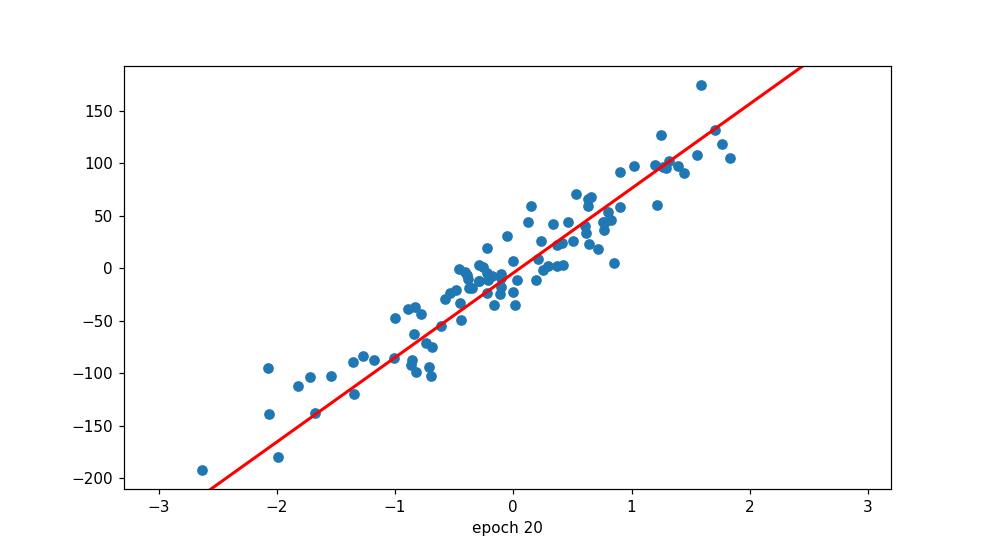

In [34]:
# Plotting graph and displaying Animation
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation4.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)

## Batch Gradient Decent for n number of Features

In [13]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np

X,y = load_diabetes(return_X_y = True)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
X_train.shape

(353, 10)

In [9]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
print(lr.coef_, lr.intercept_)

[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488] 151.3456553477407


In [11]:
lr.score(X_test,y_test)

0.45260660216173787

In [8]:
# Making Gradient decent Class for n dimension 
"""class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
"""

'class GDRegressor:\n    \n    def __init__(self,learning_rate=0.01,epochs=100):\n        \n        self.coef_ = None\n        self.intercept_ = None\n        self.lr = learning_rate\n        self.epochs = epochs\n        \n    def fit(self,X_train,y_train):\n        # init your coefs\n        self.intercept_ = 0\n        self.coef_ = np.ones(X_train.shape[1])\n        \n        for i in range(self.epochs):\n            # update all the coef and the intercept\n            y_hat = np.dot(X_train,self.coef_) + self.intercept_\n            #print("Shape of y_hat",y_hat.shape)\n            intercept_der = -2 * np.mean(y_train - y_hat)\n            self.intercept_ = self.intercept_ - (self.lr * intercept_der)\n            \n            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]\n            self.coef_ = self.coef_ - (self.lr * coef_der)\n        \n        print(self.intercept_,self.coef_)\n    \n    def predict(self,X_test):\n        return np.dot(X_test,self.coef_) 

In [14]:
class GDRegressor2:
    def __init__(self,learning_rate,epoch):
        self.intercept_ = None
        self.coef_ = None
        self.lr = learning_rate
        self.epoch = epoch
    
    def fit(self, X_train, y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epoch):
            #Calculating Y_hat => y_hat = B0 + B1*X1 + B2*X2 ..... Bn*Xn
            y_hat = self.intercept_ + np.dot(X_train,self.coef_)
            
            #Intercept derivative of loss
            intercept_der = -2 * np.mean((y_train - y_hat))
            
            #Appling Gradient decent
            self.intercept_ = self.intercept_ - self.lr*intercept_der
            
            # Coffecent Derivative
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            
            #Appling Gradient dececnt
            self.coef_ = self.coef_ - (coef_der*self.lr)
        
        print("B0 : ",self.intercept_," | B1-Bn :",self.coef_)
    
    def predict(X):
        return np.dot(X,self.coef_) + self.intercept_
        

In [24]:
bgd = GDRegressor2(0.001, 10000)
bgd.fit(X_train,y_train)

B0 :  153.49403147644455  | B1-Bn : [ 13.9019503    0.59029062  43.01981564  32.44170422  13.53207132
  10.25294552 -25.14952744  29.63080504  39.24114913  28.03874825]
